# Datasets

Датасет 1 - успеваемость студентов [ссылка](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)

В нем есть GPA и GradeClass, оба этих столбца это оценка, но GPA это вещественное значение, которое можно использовать для регрессии, а GradeClass можно использовать для классфикации.

Датасет 2 - спортзал [ссылка](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)

gym

В них нет пропусков данных.

In [32]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [13]:
dataset1 = pd.read_csv("student_performance.csv")
dataset2 = pd.read_csv("gym_members.csv")

In [14]:
# Turn gender into int
dataset2['Gender'] = dataset2['Gender'].replace({'Female': '0', 'Male': '1'}).infer_objects(copy=False)

In [15]:
# One Hot Workout Type 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
dataset2 = encode_and_bind(dataset2, "Workout_Type")

In [16]:
# Classification dataset from dataset1
# Target is GradeClass
class_1 = dataset1.drop(columns=["Ethnicity", "StudentID", "GPA"])
X_class_1 = class_1.drop(["GradeClass"], axis=1)
y_class_1 = class_1["GradeClass"]

Xc1_train, Xc1_test, yc1_train, yc1_test = train_test_split(X_class_1, y_class_1, test_size=0.3)

In [17]:
# Classification dataset from dataset2
# Target is Gender
class_2 = dataset2.drop(columns=[])
X_class_2 = class_2.drop(["Gender"], axis=1)
y_class_2 = class_2["Gender"]

Xc2_train, Xc2_test, yc2_train, yc2_test = train_test_split(X_class_2, y_class_2, test_size=0.3)

# Classification

## Dataset 1 (Student Performance)

### Simple (Default) Random Forest

```
n_estimators=100,
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt',
max_leaf_nodes=None,
```

In [27]:
rfc1_simple = RandomForestClassifier()
rfc1_simple.fit(Xc1_train, yc1_train);

In [28]:
print("Forest Score", rfc1_simple.score(Xc1_test, yc1_test))

Forest Score 0.7214484679665738


In [29]:
rfc1_simple_pred = rfc1_simple.predict(Xc1_test)
print(classification_report(yc1_test, rfc1_simple_pred))

              precision    recall  f1-score   support

         0.0       0.36      0.17      0.23        24
         1.0       0.53      0.40      0.46        80
         2.0       0.55      0.66      0.60       120
         3.0       0.64      0.49      0.55       139
         4.0       0.85      0.94      0.89       355

    accuracy                           0.72       718
   macro avg       0.59      0.53      0.55       718
weighted avg       0.70      0.72      0.71       718



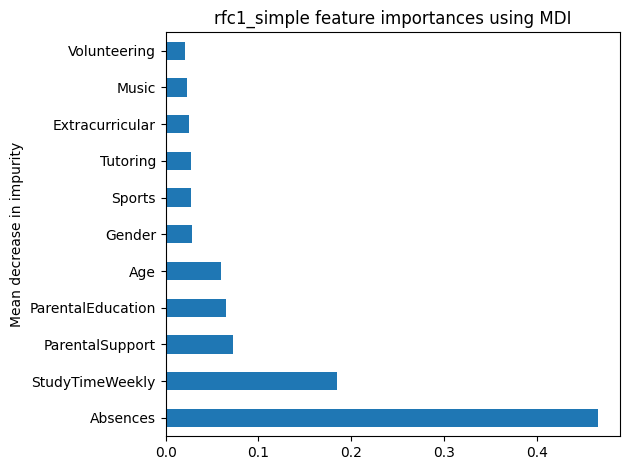

In [42]:
# Feature importance using mean decrease in impurity
rfc1_simple_importances = pd.Series(rfc1_simple.feature_importances_, index=Xc1_test.columns)
rfc1_simple_importances = rfc1_simple_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
rfc1_simple_importances.plot.barh(ax=ax)
ax.set_title("rfc1_simple feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()